In [4]:
import zipfile
import pandas as pd

# Unzip the uploaded file
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Load the dataset (adjust filename if it's different)
df = pd.read_csv('/content/covid_19_clean_complete.csv')

# Preview data
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.shape  # Rows, columns
df.columns
df.info()  # Data types, missing values
df.describe()  # Numerical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [6]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [7]:
# Fill or drop missing values
df.dropna(inplace=True)  # or df['column'].fillna(method='ffill', inplace=True)

# Convert datatypes
df['Date'] = pd.to_datetime(df['Date'])

# Remove duplicates
df.drop_duplicates(inplace=True)

Compare Recovery Rates Between Countries

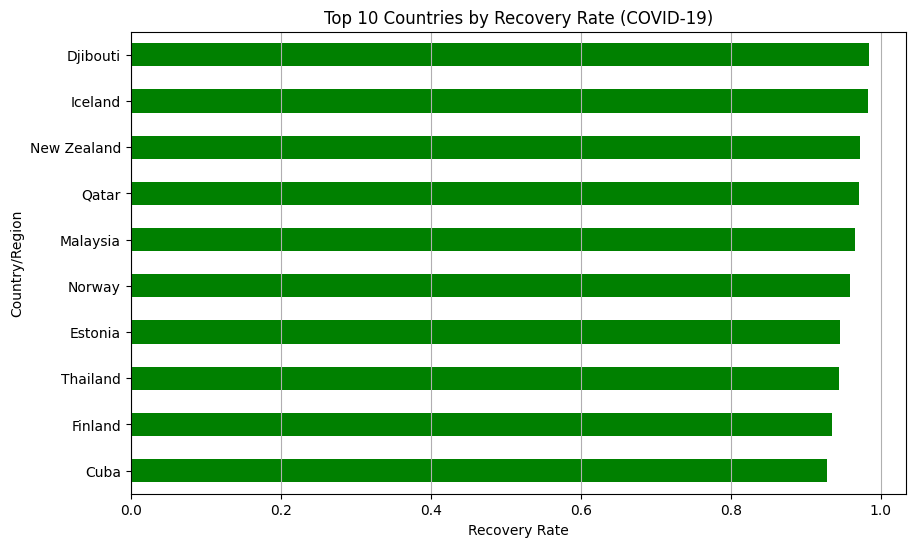

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (in case you haven't yet)
df = pd.read_csv('/content/covid_19_clean_complete.csv')

# Get the latest data for each country
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]

# Group by country and sum Confirmed & Recovered
country_group = latest_data.groupby('Country/Region')[['Confirmed', 'Recovered']].sum()

# Calculate recovery rate
country_group['Recovery Rate'] = country_group['Recovered'] / country_group['Confirmed']
country_group = country_group[country_group['Confirmed'] > 1000]  # filter out tiny countries

# Sort and visualize top 10
top_recovery = country_group.sort_values('Recovery Rate', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_recovery['Recovery Rate'].plot(kind='barh', color='green')
plt.xlabel('Recovery Rate')
plt.title('Top 10 Countries by Recovery Rate (COVID-19)')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()


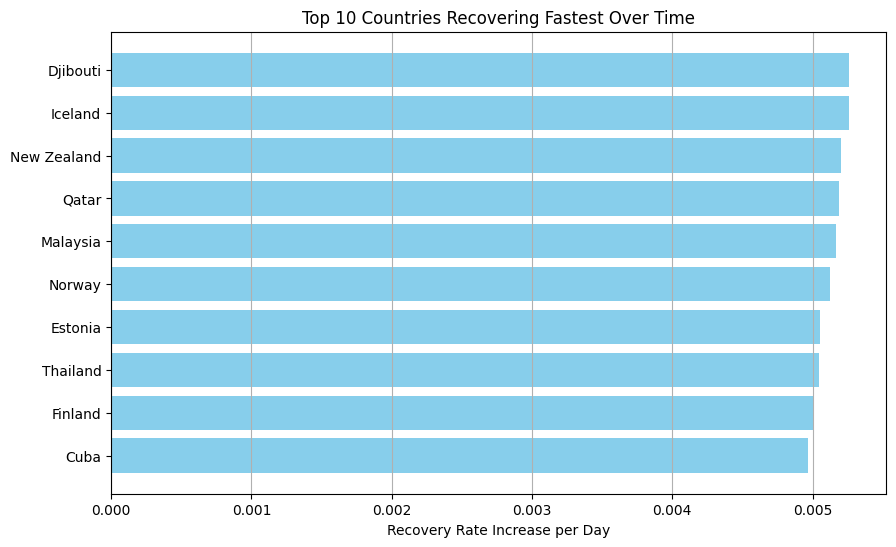

In [11]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by Country and Date, then sum the numbers
daily = df.groupby(['Country/Region', 'Date'])[['Confirmed', 'Recovered']].sum().reset_index()

# Calculate recovery rate per day
daily['Recovery Rate'] = daily['Recovered'] / daily['Confirmed']
daily = daily.replace([float('inf'), -float('inf')], 0).fillna(0)

# Calculate the slope (rate of change) of recovery rate for each country
slopes = {}

for country in daily['Country/Region'].unique():
    data = daily[daily['Country/Region'] == country]
    if len(data) > 10 and data['Confirmed'].max() > 1000:
        # Linear fit (simplified as a trendline)
        x = (data['Date'] - data['Date'].min()).dt.days
        y = data['Recovery Rate']
        slope = (y.iloc[-1] - y.iloc[0]) / (x.iloc[-1] - x.iloc[0])
        slopes[country] = slope

# Sort countries by fastest improving recovery rate
fastest = sorted(slopes.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame for plotting
fastest_df = pd.DataFrame(fastest, columns=['Country', 'Recovery Rate Growth'])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(fastest_df['Country'], fastest_df['Recovery Rate Growth'], color='skyblue')
plt.xlabel('Recovery Rate Increase per Day')
plt.title('Top 10 Countries Recovering Fastest Over Time')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()


Find the Country Recovering Fastest Over Time

<Axes: xlabel='Country/Region'>

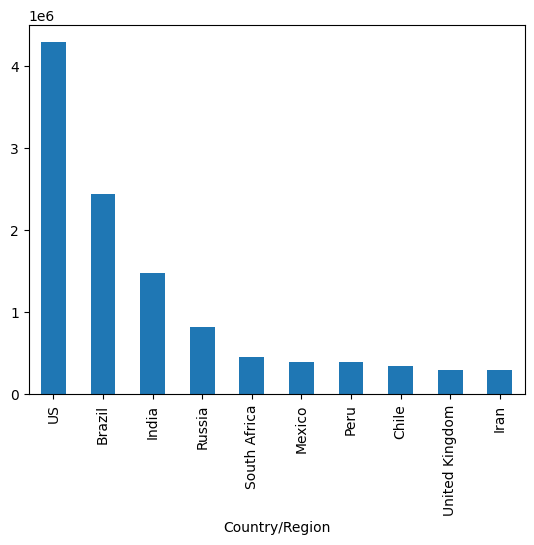

In [12]:
top_countries = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar')